# Probabilistic Thinking and Discrete Values

Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data.

The goal of statistical inference is to:

* To draw probabilistic conclusions about what we might expect if we collected the same data again.

* To draw actionable conclusions from data.

* To draw more general conclusions from relatively few data or observations.


#### Generating random numbers using the np.random module

The function, `np.random.random()`, returns a random number between zero and one . We'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

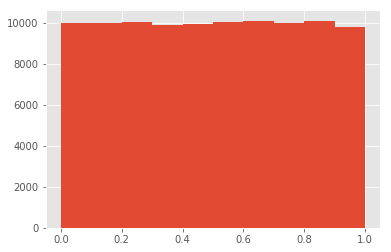

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seed the random number generator
np.random.seed(42)

# set plot style
plt.style.use('ggplot')

# Initialize an empty array, random_numbers, of 100,000 entries to store the random numbers. 
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

plt.hist(random_numbers)
plt.show();

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability `p` of landing heads (success) and probability `1−p` of landing tails (failure). We'll write a function to perform `n` Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of `n` Bernoulli trials, each of which has probability `p` of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

In [3]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1
        return n_success

    return n_success

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function and record how many defaults we get. Here, a **success is a default**. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, we'll will plot a histogram describing the probability of the number of defaults.

/home/theboymo/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


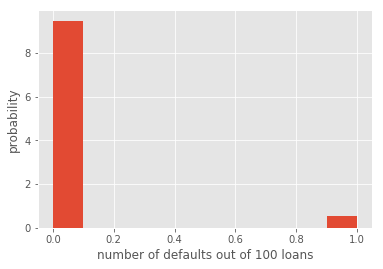

In [11]:
# Initialize n_defaults, an empty array, using np.empty(). 
# It should contain 1000 entries, since we are doing 1000 simulations.
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Write a for loop with 1000 iterations to compute the number of defaults per 100 loans 
# using the perform_bernoulli_trials() function. It accepts two arguments: the number 
# of trials n - in this case 100 - and the probability of success p - in this case the 
# probability of a default, which is 0.05. On each iteration of the loop store the 
# result in an entry of n_defaults.
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

Actual Plot!

![actual plot](./imgs/berolli-test.png)

**Will the bank fail?**

Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [5]:
# from notebook 1
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    # The x-values are the sorted data. Use the np.sort() function to perform the sorting.
    x = np.sort(data)

    # y-data for the ECDF: y
    # The y data of the ECDF go from 1/n to 1 in equally spaced increments. 
    # You can construct this using np.arange(). Remember, however, that the end 
    # value in np.arange() is not inclusive. Therefore, np.arange() will need 
    # to go from 1 to n+1. Be sure to divide this by n.
    y = np.arange(1, n + 1) / n

    return x, y


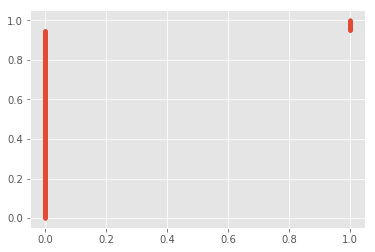

Probability of losing money = 0.0


In [12]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


Actual plot!

![](./imgs/plot-1.png)

As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

### Sampling out of the Binomial distribution

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

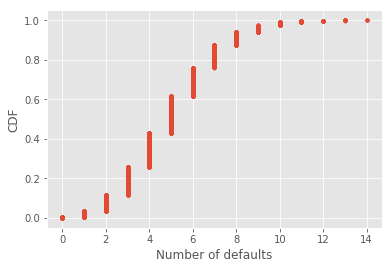

In [13]:
# Draw samples out of the Binomial distribution using np.random.binomial(). 
# You should use parameters n = 100 and p = 0.05, and set the size keyword argument to 10000
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels. The x-axis here is the number of 
# defaults out of 100 loans, while the y-axis is the CDF.
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('Number of defaults')
plt.ylabel('CDF')

# Show the plot
plt.show()


### Plotting the PMF

Plotting the PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram. The trick is setting up the edges of the bins to pass to `plt.hist()` via the `bins` keyword argument. We want the `bins` centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5, ...` up to `max(n_defaults) + 1.5`. You can generate an array like this using `np.arange()` and then subtracting `0.5` from the array.

/home/theboymo/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


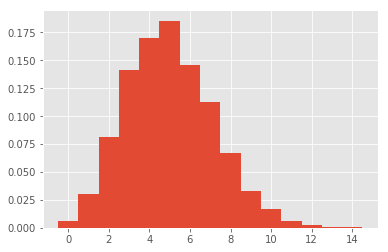

In [14]:
# Using np.arange(), compute the bin edges such that the bins are 
# centered on the integers. Store the resulting array in the variable bins.
bins = np.arange(0, 14 + 1.5) - 0.5

# Use plt.hist() to plot the histogram of n_defaults with 
# the normed=True and bins=bins keyword arguments
plt.hist(n_defaults, bins=bins, normed=True)

# Label axes
plt.xlabel('')
plt.ylabel('')
plt.show()

### Relationship between Binomial and Poisson distributions

Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to `np` approximates a Binomial distribution for `n` Bernoulli trials with probability `p` of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. We'll will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of `10`. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters `n` and `p` such that `np=10`.

In [15]:
# Using the np.random.poisson() function, draw 10000 
# samples from a Poisson distribution with a mean of 10.
samples_poisson = np.random.poisson(10, 10000)

# Make a list of the n and p values to consider for the Binomial distribution. 
# Choose n = [20, 100, 1000] and p = [0.5, 0.1, 0.01] so that np is always 10.
print('Poisson: ', np.mean(samples_poisson), np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Using np.random.binomial() inside the provided for loop, draw 10000 samples 
# from a Binomial distribution with each n, p pair and print the mean and 
# standard deviation of the samples. There are 3 n, p pairs: 20, 0.5, 100, 0.1, and 1000, 0.01. 
# These can be accessed inside the loop as n[i], p[i].
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)
    print('n =', n[i], 'Binom:', np.mean(samples_binomial), np.std(samples_binomial))


Poisson:  10.0117 3.1741082385451196
n = 20 Binom: 10.0658 2.248526264022727
n = 100 Binom: 10.0305 2.983851495969597
n = 1000 Binom: 10.0253 3.138958411639122


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability `p` gets lower and lower.

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval.

In Baseball 1990 and 2015 season's featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [16]:
# Draw 10000 samples from a Poisson distribution with a mean of 251/115 and assign to n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)

# Determine how many of your samples had a result greater than or equal to 7 and assign to n_large
n_large = np.sum(n_nohitters >= 7)

# Compute the probability, p_large, of having 7 or more no-hitters by 
# dividing n_large by the total number of samples (10000).
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0071


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.